In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Explore how the Neural Network looks like here:

http://alexlenail.me/NN-SVG/index.html

In [3]:
# explore dataset
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

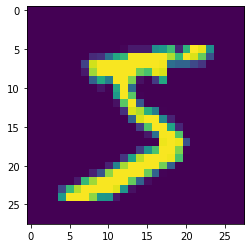

In [6]:
plt.imshow(X[0].reshape(28,28))

In [7]:
y[0]

'5'

In [9]:
# 2 hidden layers with 50 and 40 neurons respectively
mlp = MLPClassifier(hidden_layer_sizes=(50,40), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [10]:
# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32508392
Iteration 2, loss = 0.13217968
Iteration 3, loss = 0.10167054
Iteration 4, loss = 0.08657598
Iteration 5, loss = 0.07200050
Iteration 6, loss = 0.06470562
Iteration 7, loss = 0.05532422
Iteration 8, loss = 0.04842807
Iteration 9, loss = 0.04626973
Iteration 10, loss = 0.04152546
Training set score: 0.988683
Test set score: 0.971100


In [14]:
# codeff_ method stores the weights and has n-1 entries
mlp.coefs_[0]

array([[-0.01405516,  0.03731949, -0.08467273, ..., -0.0349585 ,
        -0.03594751, -0.06266732],
       [-0.08141165,  0.03029191, -0.04884564, ...,  0.01248014,
        -0.08420591,  0.0198425 ],
       [-0.02936362,  0.00458322,  0.0653725 , ...,  0.03607697,
         0.01011511, -0.08256532],
       ...,
       [ 0.02848052, -0.07641292, -0.01940089, ..., -0.06692097,
        -0.0281908 , -0.05097943],
       [-0.05605756,  0.08426531, -0.07566693, ..., -0.03975366,
        -0.06697031,  0.08218818],
       [ 0.04899327,  0.04567228, -0.01877677, ...,  0.04117367,
        -0.00405521, -0.05411453]])

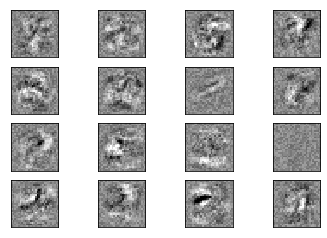

In [15]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

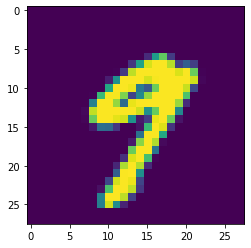

In [18]:
# Choose a random index (feel free to edit this)
idx = 20

# Show image
plt.imshow(X_test[idx].reshape(28,28))
plt.show()

In [19]:
# Show our prediction
mlp.predict(X_test[idx].reshape(1, 784))

array(['9'], dtype='<U1')